### RFM 분석



In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### 분석 보고서의 필수요소

### 실습과제

In [2]:
# 넘파이, 판다스 불러오기
import numpy as np
import pandas as pd
#시각화코드
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한국어 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트의 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 통계 분석 
from scipy import stats

# 카이제곱검정 
from scipy.stats import chi2_contingency

df = pd.read_csv('미니프로젝트-쇼핑몰 실습데이터.csv', encoding='euc-kr')
df.head()

C:\Users\simhyunji\AppData\Local\Temp\ipykernel_24512\2891263501.py:21: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('미니프로젝트-쇼핑몰 실습데이터.csv', encoding='euc-kr')


,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,"5,000",신용카드,2019-12-13,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,"5,000",신용카드,2019-12-16,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,"67,500",신용카드,2019-12-16,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,"30,000",신용카드,2019-12-16,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16,구매확정,N,NaN,NaN


In [3]:
# 데이터 형 변형
df['주문일자']= pd.to_datetime(df['주문일자'])
df['주문수량'] = df['주문수량'].str.replace(',', '')
df['주문수량'] = df['주문수량'].astype(float)
df['판매금액'] = df['판매금액'].str.replace(',', '')
df['판매금액'] = df['판매금액'].astype(float)

In [4]:
# 데이터 형 변형
df['판매금액'] = df['판매금액'].astype(int)

In [5]:
# 판매금액
df['판매금액'].unique()

array([  5000,  67500,  30000, ..., 712500,  19380, 161500])

In [6]:
df['판매금액'].max() # 천구백팔십만

19800000

In [7]:
df['판매금액'].min() # 0

0

In [8]:
df.sort_values('판매금액')

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
35489,201228142223958,지니,[스마트 HBM*초도] 화일박스 (1팩 5개입),NaN,0.0,0,신 + 웰컴,2020-12-28,미결제,Y,NaN,NaN
136281,220328214532844,쥬크박스,[학생선물] 1000 몰랑 좌철수첩 ver3,NaN,0.0,0,신용카드,2022-03-28,부분취소,N,NaN,NaN
147114,220429102649328,쥬크박스,[만들기] 5000 텀블러백 만들기 (옵션선택),NaN,0.0,0,신용카드,2022-04-29,미결제,N,NaN,NaN
35481,201228141619621,지니,[스마트 HBM*초도] 화일박스 (1팩 5개입),NaN,0.0,0,신 + 웰컴,2020-12-28,미결제,Y,NaN,NaN
14032,200624145106358,이든교육,[행사용품] 충전식 LED 링 스탠드,이든교육,1.0,0,신용카드,2020-06-24,미결제,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44977,210211095043562,다우기술,[명절상품권특가] 신세계 상품권 교환권-4만원권,신세계,250.0,9275000,신용카드,2021-02-11,미결제,N,NaN,NaN
74292,210714183022909,다우기술,[신세계] 신세계 상품권-4만원권,신세계,250.0,9600000,신용카드,2021-07-14,구매확정,N,NaN,NaN
73925,210713083310134,다우기술,[신세계] 신세계 상품권-4만원권,신세계,250.0,9600000,신용카드,2021-07-13,구매확정,N,NaN,NaN
44403,210207222549511,다우기술,[명절상품권특가] 신세계 상품권 교환권-4만원권,신세계,300.0,11130000,신용카드,2021-02-07,미결제,N,NaN,NaN


In [9]:
df[df['판매금액'] == 0].head(5)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
218,191223170919449,라온웍스,[주문제작] HBE 2019겨울방학 전단지-산북교실학원,NaN,1.0,0,신용카드,2019-12-23,미결제,N,NaN,NaN
244,191224005505205,지니,HBE그래머 노트(노랑)-1세트 50부,HB,1.0,0,신용카드,2019-12-24,주문취소,N,NaN,NaN
246,191224005505205,지니,HBE그래머 노트(파랑)-1세트 50부,HB,1.0,0,신용카드,2019-12-24,주문취소,N,NaN,NaN
250,191224005505205,지니,HBEBank Book-1세트 50개입,HB,1.0,0,신용카드,2019-12-24,주문취소,N,NaN,NaN
252,191224005505205,지니,HBE소봉투-1세트 100장입,HB,1.0,0,신용카드,2019-12-24,주문취소,N,NaN,NaN


C:\Users\simhyunji\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


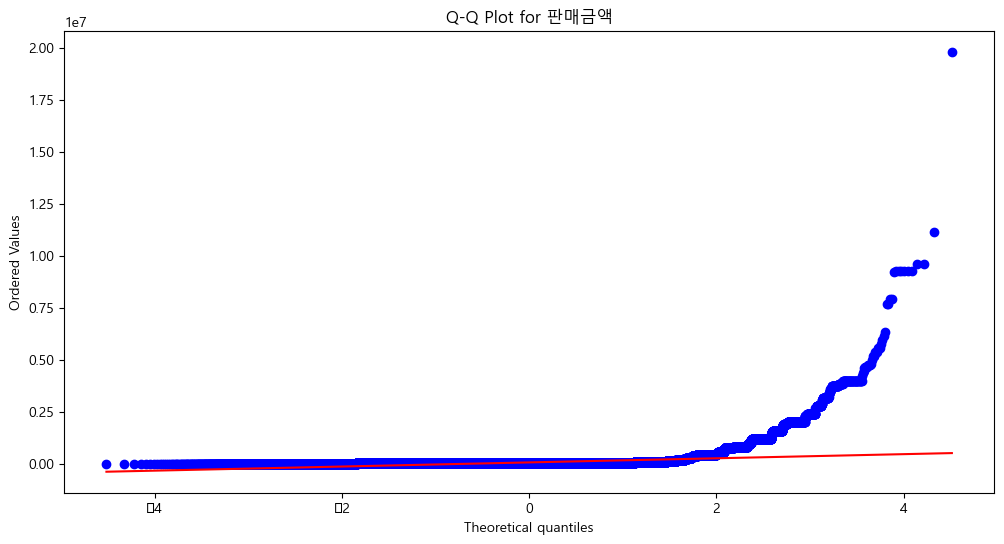

Text(0.5, 1.0, 'Scatter Plot for 판매금액 vs. Normal Distribution')

C:\Users\simhyunji\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


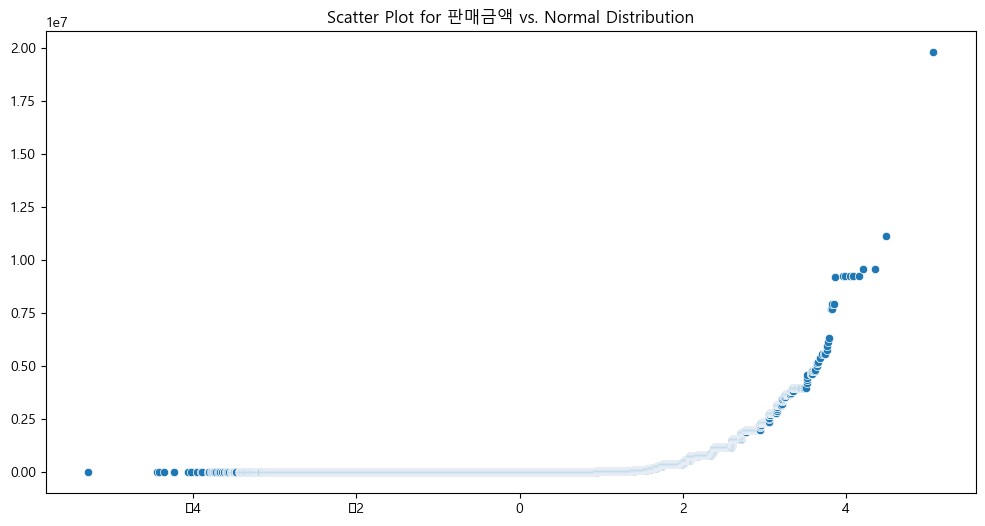

In [10]:
import numpy as np
from scipy import stats
# QQ 플롯 그리기
plt.figure(figsize=(12, 6))

# 정규분포의 분위수 계산
stats.probplot(df['판매금액'], plot=plt)

# 그래프 제목 추가
plt.title('Q-Q Plot for 판매금액')

# 그래프 표시
plt.show()

# 산점도 그리기
plt.figure(figsize=(12, 6))

# 대장금액(원)과 정규분포와의 산점도
sns.scatterplot(x=np.sort(stats.norm.rvs(size=len(df['판매금액']))),
                y=np.sort(df['판매금액']))

# 그래프 제목 및 축 레이블 추가
plt.title('Scatter Plot for 판매금액 vs. Normal Distribution')

In [11]:
#로그변환
df['로그_판매금액'] = np.log1p(df['판매금액'])

C:\Users\simhyunji\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


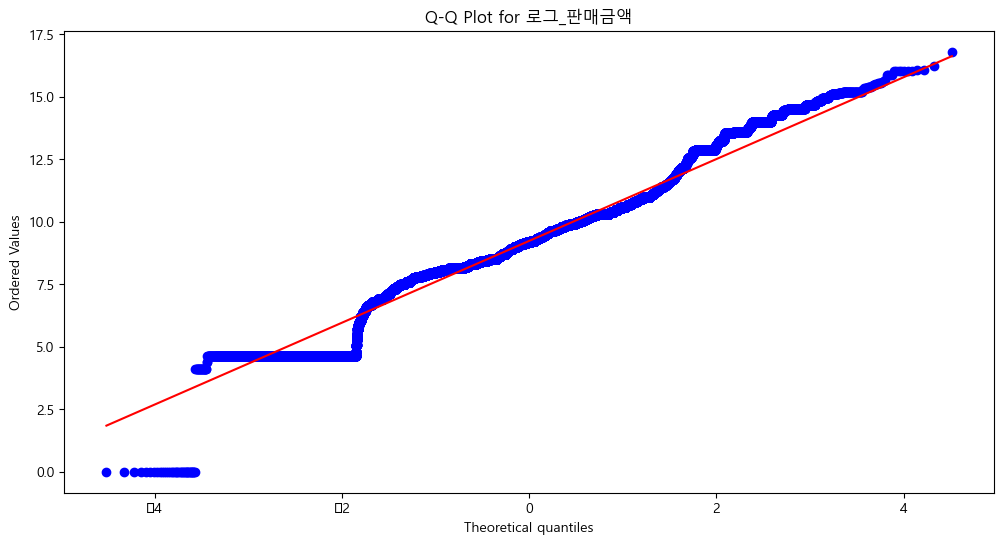

Text(0.5, 1.0, 'Scatter Plot for 로그_판매금액 vs. Normal Distribution')

C:\Users\simhyunji\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


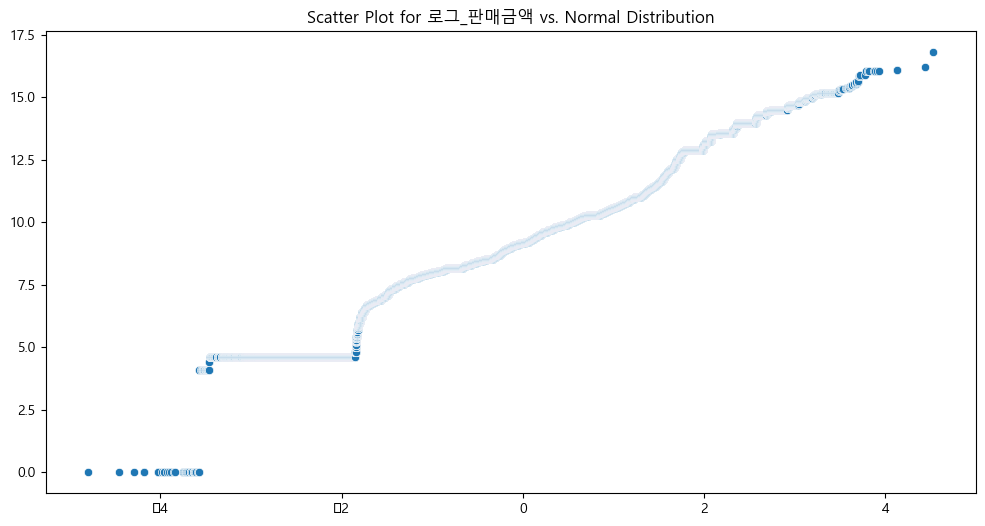

In [12]:
# QQ 플롯 그리기
plt.figure(figsize=(12, 6))

# 정규분포의 분위수 계산
stats.probplot(df['로그_판매금액'], plot=plt)

# 그래프 제목 추가
plt.title('Q-Q Plot for 로그_판매금액')

# 그래프 표시
plt.show()

# 산점도 그리기
plt.figure(figsize=(12, 6))

# 대장금액(원)과 정규분포와의 산점도
sns.scatterplot(x=np.sort(stats.norm.rvs(size=len(df['로그_판매금액']))),
                y=np.sort(df['로그_판매금액']))

# 그래프 제목 및 축 레이블 추가
plt.title('Scatter Plot for 로그_판매금액 vs. Normal Distribution')

In [13]:
# 지니 업체명 통일
df['업체명'] = df['업체명'].str.replace('지니 태블릿', '지니')
df['업체명'] = df['업체명'].str.replace('지니(후불집행)', '지니',regex=False) # 파이썬 3.9.13 버전에서 작성하여 regex=False 옵션을 주었습니다. * 최신버전은 옵션을 주지 않아도 괜찮음

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218601 entries, 0 to 218600
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   주문번호     218601 non-null  int64         
 1   업체명      218600 non-null  object        
 2   상품명      218515 non-null  object        
 3   제조사      191436 non-null  object        
 4   주문수량     196608 non-null  float64       
 5   판매금액     218601 non-null  int32         
 6   결제방법     218587 non-null  object        
 7   주문일자     218601 non-null  datetime64[ns]
 8   처리상태     218601 non-null  object        
 9   초도상품     218601 non-null  object        
 10  제작문구 내역  6034 non-null    object        
 11  할부기간     1927 non-null    object        
 12  로그_판매금액  218601 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(8)
memory usage: 20.8+ MB


In [15]:
df['주문일자'] = pd.to_datetime(df['주문일자'])

# 분기를 나누기 위한 함수
def get_quarter(month):
    if month.month <= 3:
        return '1분기'
    elif month.month <= 6:
        return '2분기'
    elif month.month <= 9:
        return '3분기'
    else:
        return '4분기'

# 주문일자를 기준으로 분기 추가
df['분기'] = df['주문일자'].apply(get_quarter)
df.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,로그_판매금액,분기
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,N,NaN,NaN,8.517393,4분기
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,N,NaN,NaN,8.517393,4분기
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,N,NaN,NaN,11.119898,4분기
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16,구매확정,N,NaN,NaN,10.308986,4분기
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16,구매확정,N,NaN,NaN,6.621406,4분기


In [16]:
# Recency(최근성) 계산
df['Recency'] = (pd.to_datetime('today') - df['주문일자']).dt.days
df.sort_values('Recency')

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,로그_판매금액,분기,Recency
218600,221108105148171,다우기술,[특별한 크리스마스] 2차-신세계 상품권 모바일 교환권-1만원권,신세계,NaN,161500,신용카드,2022-11-08,배송완료,N,NaN,NaN,11.992267,4분기,415
218542,221108014104654,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,NaN,8900,신용카드,2022-11-08,배송완료,N,NaN,NaN,9.093919,4분기,415
218543,221108014156968,다우기술,[따뜻달달특가] 스타벅스-간편한 한끼 세트(HOT),스타벅스,NaN,5950,신용카드,2022-11-08,배송완료,N,NaN,NaN,8.691315,4분기,415
218544,221108014345564,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,NaN,8900,신용카드,2022-11-08,배송완료,N,NaN,NaN,9.093919,4분기,415
218545,221108014719797,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,NaN,8900,신용카드,2022-11-08,배송완료,N,NaN,NaN,9.093919,4분기,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16,구매확정,N,NaN,NaN,6.621406,4분기,1473
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16,구매확정,N,NaN,NaN,10.308986,4분기,1473
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,N,NaN,NaN,11.119898,4분기,1473
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,N,NaN,NaN,8.517393,4분기,1473


In [17]:
# 연도별 필터링
df['주문연도'] = df['주문일자'].dt.year
df['주문월'] = df['주문일자'].dt.month
df['주문연도월'] = df['주문일자'].dt.to_period('M')
df.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,N,NaN,NaN,8.517393,4분기,1476,2019,12,2019-12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,N,NaN,NaN,8.517393,4분기,1473,2019,12,2019-12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,N,NaN,NaN,11.119898,4분기,1473,2019,12,2019-12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16,구매확정,N,NaN,NaN,10.308986,4분기,1473,2019,12,2019-12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16,구매확정,N,NaN,NaN,6.621406,4분기,1473,2019,12,2019-12


In [18]:
#pd.set_option('display.max_rows',None)

In [19]:
# 데이터의 행,열 수 확인
df.shape

(218601, 18)

In [20]:
df.isnull().sum()

주문번호            0
업체명             1
상품명            86
제조사         27165
주문수량        21993
판매금액            0
결제방법           14
주문일자            0
처리상태            0
초도상품            0
제작문구 내역    212567
할부기간       216674
로그_판매금액         0
분기              0
Recency         0
주문연도            0
주문월             0
주문연도월           0
dtype: int64

In [21]:
# 데이터 필터링
df[df['상품명'].isnull()].head(3) # 상품명이 null 값인 경우, 평균대치나 이전(후)값 대치로는 무리가 있어 제거로 결정

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
10505,200430213027636,스테툴스,NaN,한국제지,6.0,32400,포인트,2020-04-30,구매확정,N,NaN,NaN,10.385945,2분기,1337,2020,4,2020-04
10513,200501124027822,스테툴스,NaN,한국제지,5.0,44500,신용카드,2020-05-01,미결제,N,NaN,NaN,10.703267,2분기,1336,2020,5,2020-05
10515,200501124426914,스테툴스,NaN,한국제지,5.0,44500,포인트,2020-05-01,구매확정,N,NaN,NaN,10.703267,2분기,1336,2020,5,2020-05


In [22]:
df[df['결제방법'].isnull()] # 결제방법이 null 값인 경우, 평균대치나 이전(후)값 대치로는 무리가 있어 제거로 결정

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
889,200107111249730,산스토어,[동원] 명절 식품 선물세트 + 동원 판호,NaN,1.0,0,NaN,2020-01-07,미결제,N,NaN,NaN,0.000000,1분기,1451,2020,1,2020-01
21272,200824085224365,오피스퀵,"[특가/무배] 무림 하이브라이트 A4 75g 1Box(2,500매입)",무림제지,1.0,0,NaN,2020-08-24,주문취소,N,NaN,NaN,0.000000,3분기,1221,2020,8,2020-08
23231,200916000227633,지니,[특가/무배] 국산/개별포장-보건용 마스크 KF94-대형 1갑 50개입,마스크공작소,1.0,0,NaN,2020-09-16,주문취소,N,NaN,NaN,0.000000,3분기,1198,2020,9,2020-09
23232,200916000518884,지니,[특가/무배] 국산/개별포장-보건용 마스크 KF94-대형 1갑 50개입,마스크공작소,1.0,0,NaN,2020-09-16,미결제,N,NaN,NaN,0.000000,3분기,1198,2020,9,2020-09
23233,200916000710623,지니,[특가/무배] 국산/개별포장-보건용 마스크 KF94-대형 1갑 50개입,마스크공작소,2.0,0,NaN,2020-09-16,미결제,N,NaN,NaN,0.000000,3분기,1198,2020,9,2020-09
23234,200916001131731,지니,[특가/무배] 국산/개별포장-보건용 마스크 KF94-대형 1갑 50개입,마스크공작소,1.0,0,NaN,2020-09-16,주문취소,N,NaN,NaN,0.000000,3분기,1198,2020,9,2020-09
25898,201021094955917,지니,[스마트 HBM] 시범운영 가맹용 태블릿,삼성전자,1.0,396000,NaN,2020-10-21,미결제,N,NaN,NaN,12.889172,4분기,1163,2020,10,2020-10
25899,201021095006768,지니,[스마트 HBM] 시범운영 가맹용 태블릿,삼성전자,1.0,396000,NaN,2020-10-21,미결제,N,NaN,NaN,12.889172,4분기,1163,2020,10,2020-10
25903,201021095053461,지니,[스마트 HBM] 시범운영 가맹용 태블릿,삼성전자,1.0,396000,NaN,2020-10-21,미결제,N,NaN,NaN,12.889172,4분기,1163,2020,10,2020-10
25917,201021102148476,지니,[스마트 HBM] 시범운영 가맹용 태블릿,삼성전자,5.0,1980000,NaN,2020-10-21,미결제,N,NaN,NaN,14.498608,4분기,1163,2020,10,2020-10


In [23]:
df[df['업체명'].isnull()].head(3) # 업체명이 null 값인 경우, 평균대치나 이전(후)값 대치로는 무리가 있어 제거로 결정

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
20842,200819101222773,NaN,HBE문고리 비닐봉투(주황)-1세트 200장,HB,4.0,12000,신용카드,2020-08-19,미결제,N,NaN,NaN,9.392745,3분기,1226,2020,8,2020-08


In [24]:
# 엄체명, 상품명, 결제방법 데이터 null 값 삭제
df= df.dropna(subset=['업체명'])
df= df.dropna(subset=['상품명'])
df= df.dropna(subset=['결제방법'])

In [25]:
df.isnull().sum()

주문번호            0
업체명             0
상품명             0
제조사         27163
주문수량        21981
판매금액            0
결제방법            0
주문일자            0
처리상태            0
초도상품            0
제작문구 내역    212467
할부기간       216574
로그_판매금액         0
분기              0
Recency         0
주문연도            0
주문월             0
주문연도월           0
dtype: int64

In [26]:
#df['업체명'].unique() # 지니를 포함한 문자열은 지니로 데이터 형식을 맞추기

In [27]:
#초도상품 데이터 확인
df['초도상품'].value_counts()

N    202497
Y     16003
Name: 초도상품, dtype: int64

In [28]:
#제작문구내역 데이터 확인

df['제작문구 내역'].unique()

array([nan, '1111111', 'HBE삼화BEST학원/T.064-759-6789', ...,
       '대구광역시 북구 호국로43길 8-20, 5층(서변동, 청림빌딩) / 010-9535-6167 / 대구북대구달성지사장 / 주용철 / Joo Yong Chul',
       '스마일 해법 영어어 교습소 010-6575-6565 엘지상가 115호',
       '4단지점 HBM교습소/ 등록번호 661-96-01559/연락처 010-5641-9071/교습과목 수학 전과목/위치 4단지 상가 203호/수강료 시간요일별 결정후'],
      dtype=object)

In [29]:
#할부기간 데이터 확인
df['할부기간'].value_counts()

12개월    823
1개월     493
6개월     395
24개월    200
18개월     15
Name: 할부기간, dtype: int64

In [30]:
df = df.drop(['초도상품'], axis=1) #분석에 사용되지 않는 데이터라 판단하여 삭제
df = df.drop(['제작문구 내역'], axis=1) #분석에 사용되지 않는 데이터라 판단하여 삭제

In [31]:
# 업체명 별 describe
# df2=df.groupby('업체명')
#df2.describe()

In [32]:
#신용카드
#포인트(비현금성) , 내돈내산 하기는 아까운데 포인트로 사면 괜찮은 물건
#적립금
#웰컴마일리지 - 회원가입시 주는 포인트, 가입축하금
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [33]:
#순수익 => 구매확정
df['처리상태'].unique()

array(['구매확정', '주문취소', '미결제', '후불반려', '환불완료', '환불승인', '부분환불', '부분취소',
       '상담취소', '교환완료', '상담형상품접수', '환불요청', '배송완료', '배송준비', '배송중', '시안확인요청',
       '결제완료'], dtype=object)

In [34]:
# 상위 3업체 나열 * 다우기술, 지니, 쥬크박스
df['업체명'].value_counts().to_frame()

,업체명
다우기술,85540
지니,64627
쥬크박스,18661
에이스디포,8387
오피스퀵,7172
...,...
리체,4
프린피아,4
링커블테크놀러지,3
한샘글로벌,3


In [35]:
df.query('업체명 == "지니"')['상품명'].unique()

array(['eHBM셀파수학교실 비닐봉투-1세트 100장입', 'eHBM셀파수학교실 삼색볼펜-1세트 50개입',
       'eHBM셀파수학교실 회원용 리플렛-1세트 50권입', ...,
       '[UPGRADE 특가] 코시-오피스 헤드셋 HS3261', '[스마트 HBE*초도] 알약볼펜-1set 100개입',
       '[UPGRADE 특가] 코시-태블릿/노트북 알미늄 접이식 거치대 ST2143'], dtype=object)

In [36]:
# df['할부기간'].unique()
# not_null_할부 = df['할부기간'] == df['할부기간']
# df[not_null_할부].head(2)

In [37]:
#top3 기업 필터링해서 df1 저장
df1 = df.loc[df['업체명'].str.contains('다우기술|지니|쥬크박스')]
df1.head(3)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,NaN,8.517393,4분기,1476,2019,12,2019-12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,NaN,8.517393,4분기,1473,2019,12,2019-12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,NaN,11.119898,4분기,1473,2019,12,2019-12


In [38]:
df1['업체명'].unique()

array(['지니', '쥬크박스', '다우기술'], dtype=object)

In [39]:
# df1 = df1.loc[df['처리상태'].str.contains('구매확정')] # 구매확정 데이터만 필터
# df1.head()

In [40]:
# 업체명과 분기를 기준으로 주문 건수 카운트
result = df1.groupby(['업체명', '분기']).size().reset_index(name='주문건수')

# 결과 출력
result


,업체명,분기,주문건수
0,다우기술,1분기,17535
1,다우기술,2분기,20561
2,다우기술,3분기,27943
3,다우기술,4분기,19501
4,쥬크박스,1분기,3511
5,쥬크박스,2분기,6703
6,쥬크박스,3분기,4893
7,쥬크박스,4분기,3554
8,지니,1분기,17941
9,지니,2분기,13432


In [41]:
# Frequency(빈도) 계산
frequency = df1.groupby('업체명')['주문번호'].count().reset_index()
frequency

,업체명,주문번호
0,다우기술,85540
1,쥬크박스,18661
2,지니,64627


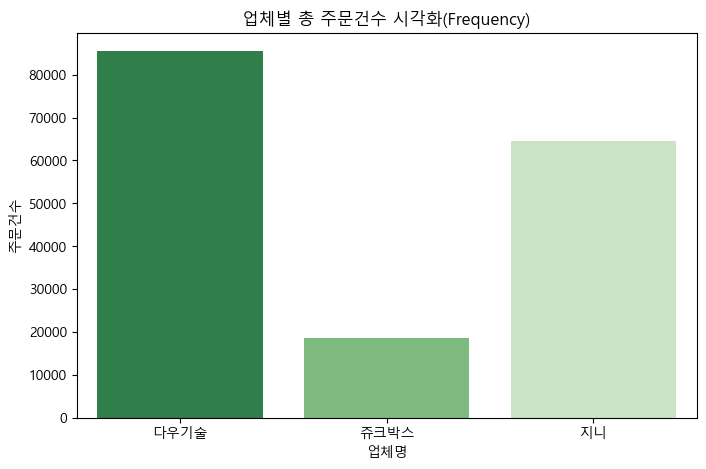

In [42]:
# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='업체명', y='주문번호', data= frequency, palette='Greens_r',)
plt.title('업체별 총 주문건수 시각화(Frequency)')
plt.xlabel('업체명')
plt.ylabel('주문건수')
plt.show()

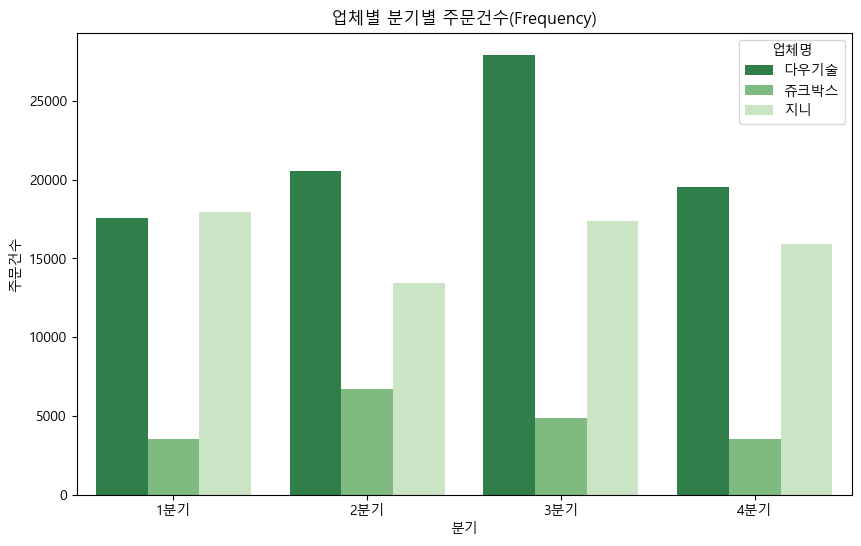

In [43]:
# 분기별 Frequency(빈도) 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='분기', y='주문건수', hue='업체명', data=result, palette='Greens_r')
plt.title('업체별 분기별 주문건수(Frequency)')
plt.show()

In [44]:
df1.loc[df['업체명'].str.contains('지니')].head(3)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,NaN,8.517393,4분기,1476,2019,12,2019-12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,NaN,8.517393,4분기,1473,2019,12,2019-12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,NaN,11.119898,4분기,1473,2019,12,2019-12


In [45]:
df1.loc[df['업체명'].str.contains('쥬크박스')].head(3)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
8,191217142849520,쥬크박스,[학생선물] 전통탈,쥬크박스,1.0,900,가상계좌,2019-12-17,주문취소,NaN,6.803505,4분기,1472,2019,12,2019-12
46,191218234913402,쥬크박스,[학생선물] 매직 시크릿 펜,쥬크박스,3.0,1800,신용카드,2019-12-18,구매확정,NaN,7.496097,4분기,1471,2019,12,2019-12
47,191218234913402,쥬크박스,[학생선물] 빙글빙글 도형자세트,쥬크박스,3.0,1800,신용카드,2019-12-18,구매확정,NaN,7.496097,4분기,1471,2019,12,2019-12


In [46]:
df1.loc[df['업체명'].str.contains('다우')].head(3)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
23964,200922120432726,다우기술,크라운)마이쮸(복숭아)800,test,1.0,800,신용카드,2020-09-22,미결제,NaN,6.685861,3분기,1192,2020,9,2020-09
23965,200922120725267,다우기술,크라운)마이쮸(복숭아)800,test,3.0,2400,신용카드,2020-09-22,미결제,NaN,7.783641,3분기,1192,2020,9,2020-09
23978,200922125547521,다우기술,크라운)마이쮸(복숭아)800,test,3.0,2400,신용카드,2020-09-22,미결제,NaN,7.783641,3분기,1192,2020,9,2020-09


In [47]:
#pd.set_option('display.max_rows',None)
# 최근 빈도 상위 50
df1.loc[df1['Recency'] < 419].head(50)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
217522,221105000548915,다우기술,[신세계] 신세계 상품권-4만원권,신세계,NaN,384000,신용카드,2022-11-05,구매확정,NaN,12.858400,4분기,418,2022,11,2022-11
217523,221105000938926,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,NaN,8900,신용카드,2022-11-05,구매확정,NaN,9.093919,4분기,418,2022,11,2022-11
217524,221105001023795,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,NaN,8900,신용카드,2022-11-05,구매확정,NaN,9.093919,4분기,418,2022,11,2022-11
217525,221105002005739,다우기술,[따뜻달달특가] 스타벅스-자몽 허니 블랙 티 T,스타벅스,NaN,54000,신용카드,2022-11-05,미결제,NaN,10.896758,4분기,418,2022,11,2022-11
217526,221105002021688,다우기술,[따뜻달달특가] 스타벅스-자몽 허니 블랙 티 T,스타벅스,NaN,54000,신용카드,2022-11-05,배송완료,NaN,10.896758,4분기,418,2022,11,2022-11
217527,221105002050821,다우기술,[따뜻달달특가] 스타벅스-자몽 허니 블랙 티 T,스타벅스,NaN,54000,신용카드,2022-11-05,배송완료,NaN,10.896758,4분기,418,2022,11,2022-11
217528,221105002121853,다우기술,[따뜻달달특가] 스타벅스-자몽 허니 블랙 티 T,스타벅스,NaN,27000,신용카드,2022-11-05,배송완료,NaN,10.203629,4분기,418,2022,11,2022-11
217529,221105014116772,다우기술,[따뜻달달특가] 스타벅스-간편한 한끼 세트(HOT),스타벅스,NaN,5950,신용카드,2022-11-05,배송완료,NaN,8.691315,4분기,418,2022,11,2022-11
217530,221105014237299,다우기술,[따뜻달달특가] 스타벅스-간편한 한끼 세트(HOT),스타벅스,NaN,5950,신용카드,2022-11-05,배송완료,NaN,8.691315,4분기,418,2022,11,2022-11
217531,221105014357320,다우기술,[따뜻달달특가] 스타벅스-기분 좋은 하루(HOT),스타벅스,NaN,11500,신용카드,2022-11-05,배송완료,NaN,9.350189,4분기,418,2022,11,2022-11


In [48]:
df1.sort_values("주문일자", ascending=False)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
218600,221108105148171,다우기술,[특별한 크리스마스] 2차-신세계 상품권 모바일 교환권-1만원권,신세계,NaN,161500,신용카드,2022-11-08,배송완료,NaN,11.992267,4분기,415,2022,11,2022-11
218539,221108012734461,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,NaN,8900,신용카드,2022-11-08,미결제,NaN,9.093919,4분기,415,2022,11,2022-11
218541,221108014048174,다우기술,[따뜻달달특가] 스타벅스-간편한 한끼 세트(HOT),스타벅스,NaN,5950,신용카드,2022-11-08,배송완료,NaN,8.691315,4분기,415,2022,11,2022-11
218542,221108014104654,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,NaN,8900,신용카드,2022-11-08,배송완료,NaN,9.093919,4분기,415,2022,11,2022-11
218543,221108014156968,다우기술,[따뜻달달특가] 스타벅스-간편한 한끼 세트(HOT),스타벅스,NaN,5950,신용카드,2022-11-08,배송완료,NaN,8.691315,4분기,415,2022,11,2022-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,NaN,8.517393,4분기,1473,2019,12,2019-12
5,191216173241622,지니,"eHBM셀파수학교실 종이컵-1박스 1,000개입",HB,1.0,16000,신용카드,2019-12-16,구매확정,NaN,9.680406,4분기,1473,2019,12,2019-12
6,191216173241622,지니,eHBM셀파수학교실-연필(빨강)_1세트 50개입,HB,1.0,6000,신용카드,2019-12-16,구매확정,NaN,8.699681,4분기,1473,2019,12,2019-12
7,191216173241622,지니,eHBM셀파수학교실-물티슈_1세트 100개입,HB,1.0,20000,신용카드,2019-12-16,구매확정,NaN,9.903538,4분기,1473,2019,12,2019-12


In [49]:
df.sort_values(['주문일자'])

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,NaN,8.517393,4분기,1476,2019,12,2019-12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,NaN,8.517393,4분기,1473,2019,12,2019-12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,NaN,11.119898,4분기,1473,2019,12,2019-12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16,구매확정,NaN,10.308986,4분기,1473,2019,12,2019-12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16,구매확정,NaN,6.621406,4분기,1473,2019,12,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218543,221108014156968,다우기술,[따뜻달달특가] 스타벅스-간편한 한끼 세트(HOT),스타벅스,NaN,5950,신용카드,2022-11-08,배송완료,NaN,8.691315,4분기,415,2022,11,2022-11
218542,221108014104654,다우기술,[따뜻달달특가] 투썸플레이스-바닐라 카페라떼(R),투썸플레이스,NaN,8900,신용카드,2022-11-08,배송완료,NaN,9.093919,4분기,415,2022,11,2022-11
218541,221108014048174,다우기술,[따뜻달달특가] 스타벅스-간편한 한끼 세트(HOT),스타벅스,NaN,5950,신용카드,2022-11-08,배송완료,NaN,8.691315,4분기,415,2022,11,2022-11
218559,221108040158843,천재태블릿,[UPGRADE 이벤트] 스마트 HBE 학습 전용 태블릿+거치대/헤드셋 증정-일반결제,삼성전자,NaN,792000,신용카드,2022-11-08,미결제,NaN,13.582318,4분기,415,2022,11,2022-11


In [50]:
# 주문연도별, 기업별 빈도수 계산
company_year_f = df.groupby(['업체명', df1['주문일자'].dt.year]).size().reset_index(name='주문건수')

# 결과 출력
company_year_f

,업체명,주문일자,주문건수
0,다우기술,2020.0,2356
1,다우기술,2021.0,27328
2,다우기술,2022.0,55856
3,쥬크박스,2019.0,97
4,쥬크박스,2020.0,1503
5,쥬크박스,2021.0,2709
6,쥬크박스,2022.0,14352
7,지니,2019.0,449
8,지니,2020.0,20418
9,지니,2021.0,23005


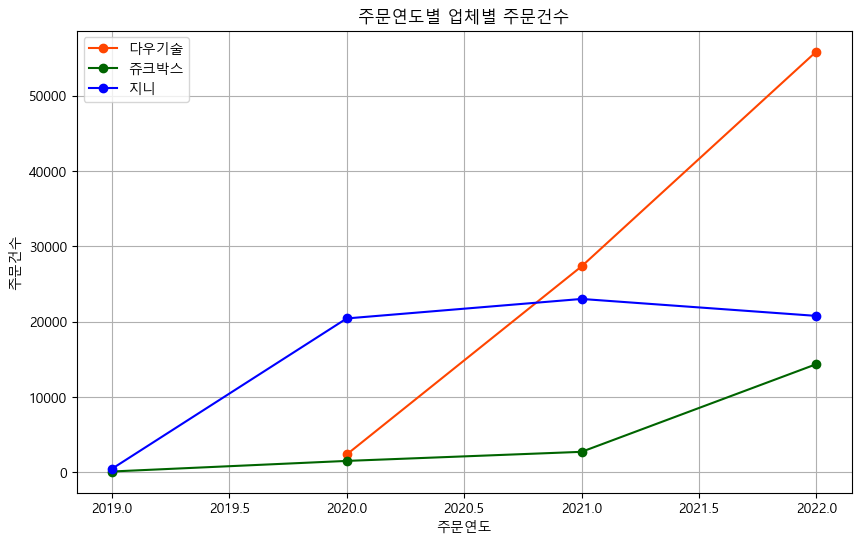

In [51]:
# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))

for company in company_year_f['업체명'].unique():
    company_data = company_year_f[company_year_f['업체명'] == company]
    
    # 각 업체에 대한 색상 설정
    if company == '다우기술':
        color = 'orangered'
    elif company == '지니':
        color = 'blue'
    elif company == '쥬크박스':
        color = 'darkgreen'
    else:
        color = 'darkseagreen'
    
    plt.plot(company_data['주문일자'], company_data['주문건수'], label=company, marker='o', color=color)

plt.xlabel('주문연도')
plt.ylabel('주문건수')
plt.title('주문연도별 업체별 주문건수')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
df1

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,NaN,8.517393,4분기,1476,2019,12,2019-12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,NaN,8.517393,4분기,1473,2019,12,2019-12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,NaN,11.119898,4분기,1473,2019,12,2019-12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16,구매확정,NaN,10.308986,4분기,1473,2019,12,2019-12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16,구매확정,NaN,6.621406,4분기,1473,2019,12,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218593,221108103020308,다우기술,[특별한 크리스마스] 2차-신세계 상품권 모바일 교환권-1만원권,신세계,NaN,85500,포인트,2022-11-08,배송완료,NaN,11.356283,4분기,415,2022,11,2022-11
218594,221108103621476,다우기술,[신세계] 신세계 상품권-1만원권,신세계,NaN,9600,신용카드,2022-11-08,배송완료,NaN,9.169623,4분기,415,2022,11,2022-11
218595,221108103722743,다우기술,[신세계] 신세계 상품권-1만원권,신세계,NaN,9600,신용카드,2022-11-08,배송완료,NaN,9.169623,4분기,415,2022,11,2022-11
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,NaN,4050,포인트,2022-11-08,배송완료,NaN,8.306719,4분기,415,2022,11,2022-11


In [53]:
#업체명 별 최근성, 합계여서 별로 정확하지 않음 top 100 결과가 나음
df11 = df1.loc[(df1['주문연도'] == 2022)]
recency = df11.groupby('업체명')['Recency'].mean().reset_index()
recency

,업체명,Recency
0,다우기술,555.400082
1,쥬크박스,561.544802
2,지니,571.147242


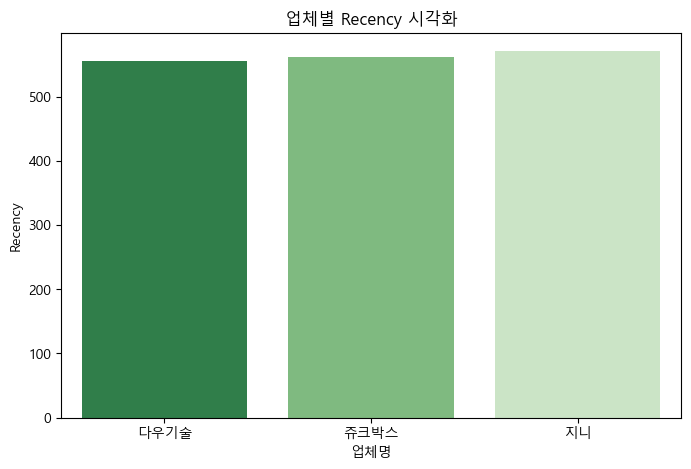

In [54]:
# 업체별 Recency 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='업체명', y='Recency', data=recency, palette='Greens_r')
plt.title('업체별 Recency 시각화')
plt.xlabel('업체명')
plt.ylabel('Recency')
plt.show()

In [55]:
# 판매금액 총 합계
monetary= df1.groupby('업체명')['로그_판매금액'].sum().reset_index()
monetary

,업체명,로그_판매금액
0,다우기술,762241.337636
1,쥬크박스,153429.198770
2,지니,611664.133477


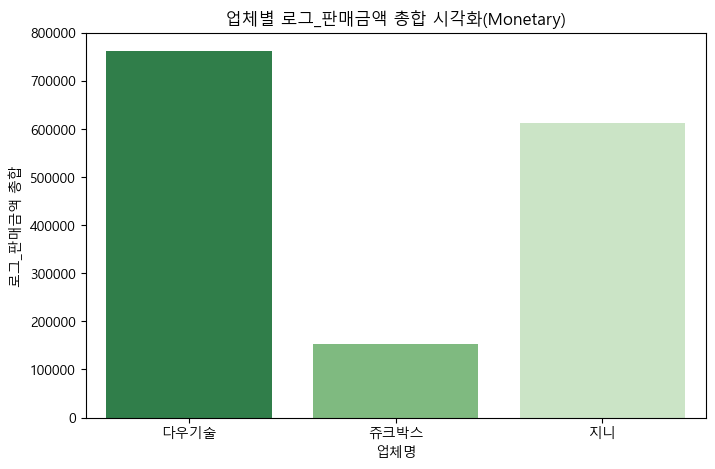

In [56]:
# 판매금액을 정수형으로 절삭
monetary['판매금액'] = monetary['로그_판매금액'].astype(int)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='업체명', y='판매금액', data=monetary, palette='Greens_r')
plt.title('업체별 로그_판매금액 총합 시각화(Monetary)')
plt.xlabel('업체명')
plt.ylabel('로그_판매금액 총합')
plt.show()

In [57]:
# 판매 평균 계산
monetary2= df1.groupby('업체명')['로그_판매금액'].mean().reset_index()
monetary2

,업체명,로그_판매금액
0,다우기술,8.910935
1,쥬크박스,8.221917
2,지니,9.464529


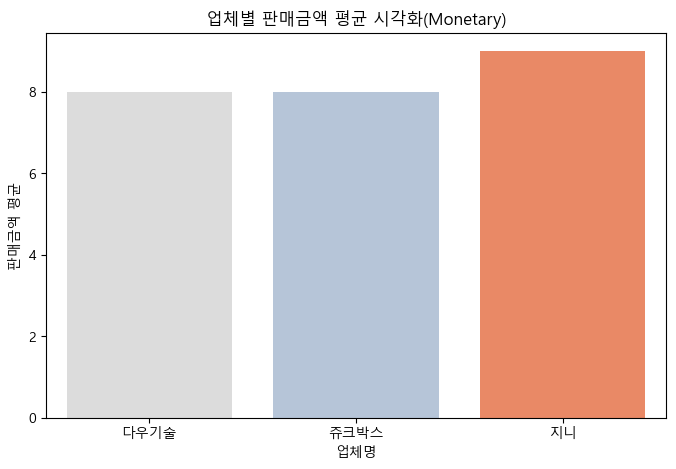

In [58]:
# 판매금액을 정수형으로 절삭
monetary2['판매금액'] = monetary2['로그_판매금액'].astype(int)
colors = ['gainsboro','lightsteelblue','coral']
# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='업체명', y='판매금액', data=monetary2, palette=colors)
plt.title('업체별 판매금액 평균 시각화(Monetary)')
plt.xlabel('업체명')
plt.ylabel('판매금액 평균')
plt.show()

In [59]:
# 업체명과 분기를 기준으로 판매금액 카운트
result2 = df1.groupby(['업체명', '분기'])['로그_판매금액'].sum().reset_index()

# 결과 출력
result2

,업체명,분기,로그_판매금액
0,다우기술,1분기,158087.749566
1,다우기술,2분기,178950.676900
2,다우기술,3분기,252153.978689
3,다우기술,4분기,173048.932481
4,쥬크박스,1분기,28844.429492
5,쥬크박스,2분기,54885.650183
6,쥬크박스,3분기,39958.759072
7,쥬크박스,4분기,29740.360024
8,지니,1분기,172220.739845
9,지니,2분기,128795.741154


Text(0, 0.5, '로그 판매금액')

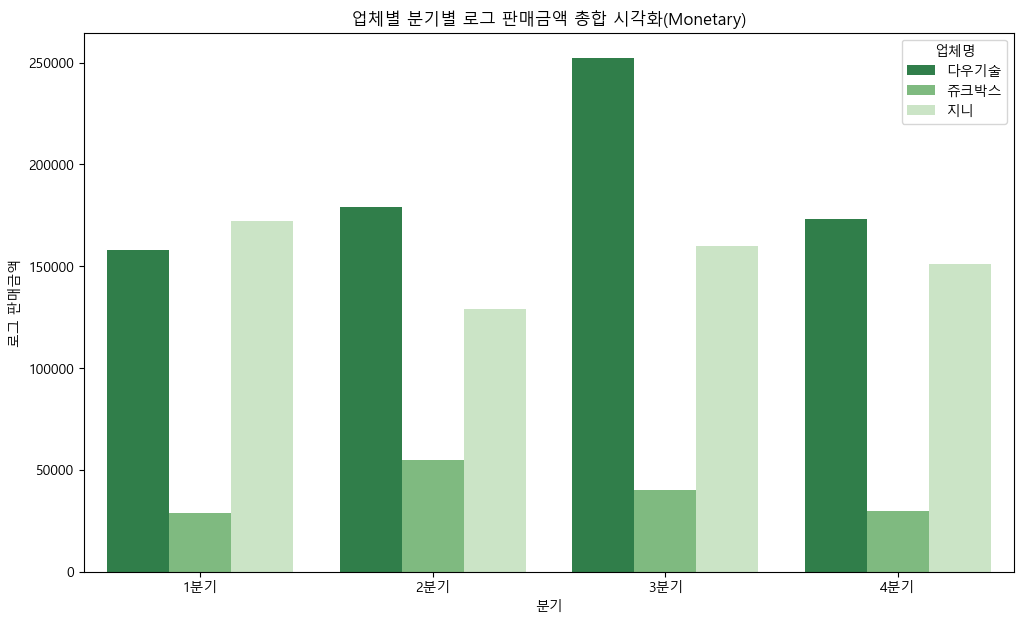

In [60]:
# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(x='분기', y='로그_판매금액', hue='업체명', data=result2, palette='Greens_r')
plt.title('업체별 분기별 로그 판매금액 총합 시각화(Monetary)')
plt.xlabel('분기')
plt.ylabel('로그 판매금액')

In [61]:
# 업체명과 분기를 기준으로 판매금액평균 카운트
result3 = df1.groupby(['업체명', '분기'])['로그_판매금액'].mean().reset_index()

# 결과 출력
result3

,업체명,분기,로그_판매금액
0,다우기술,1분기,9.015555
1,다우기술,2분기,8.703403
2,다우기술,3분기,9.023869
3,다우기술,4분기,8.873849
4,쥬크박스,1분기,8.215446
5,쥬크박스,2분기,8.188222
6,쥬크박스,3분기,8.166515
7,쥬크박스,4분기,8.368137
8,지니,1분기,9.599283
9,지니,2분기,9.588724


Text(0, 0.5, '로그 판매금액')

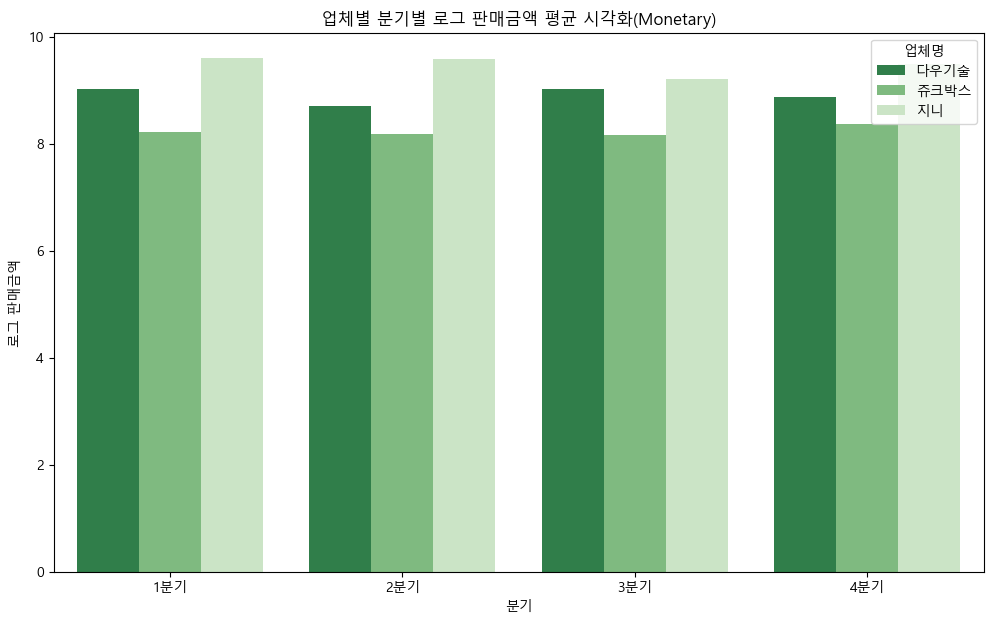

In [62]:
# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(x='분기', y='로그_판매금액', hue='업체명', data=result3, palette='Greens_r')
plt.title('업체별 분기별 로그 판매금액 평균 시각화(Monetary)')
plt.xlabel('분기')
plt.ylabel('로그 판매금액')

#### 월별 , 연도별 매출

In [63]:
# 연도별 매출 합계
answer1 = df.groupby(['주문연도'])['로그_판매금액'].sum().reset_index()
answer1

,주문연도,로그_판매금액
0,2019,5391.208834
1,2020,347229.996814
2,2021,675587.435462
3,2022,989308.206978


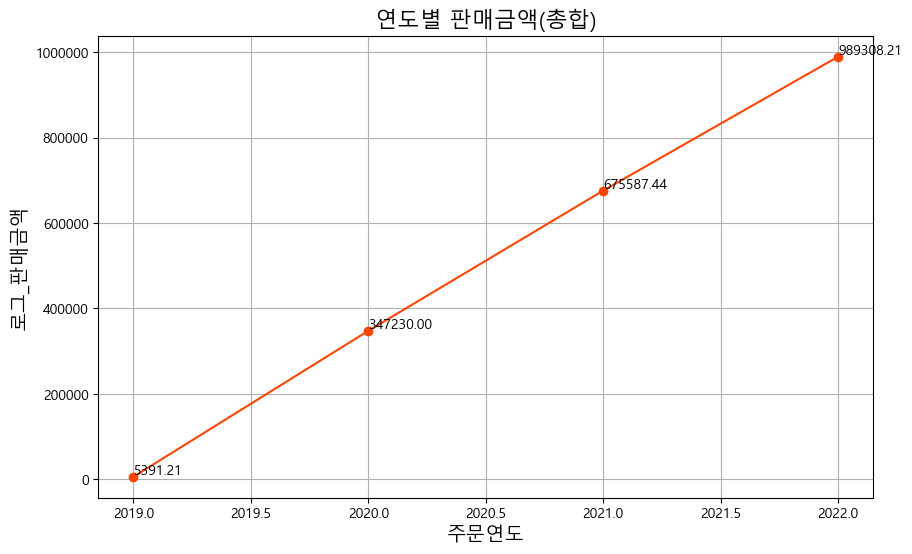

In [64]:
# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(answer1['주문연도'], answer1['로그_판매금액'], marker='o', linestyle='-', color='orangered')  # 꺾은선 그래프 설정

# 그래프 제목과 라벨 설정
plt.title('연도별 판매금액(총합)', fontsize=16)
plt.xlabel('주문연도', fontsize=14)
plt.ylabel('로그_판매금액', fontsize=14)

# y-axis의 눈금 표시 형식 설정
plt.ticklabel_format(axis='y', style='plain')  # plain은 일반적인 숫자 형식으로 표시


# x축과 y축에 축값 표기
for i, txt in enumerate(answer1['로그_판매금액']):
    plt.text(answer1['주문연도'][i], txt, f'{txt:.2f}', ha='left', va='bottom')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


In [65]:
# #연도별 매출
# answer2 = df.groupby(['주문연도'])['판매금액'].sum().reset_index()
# answer2

In [66]:
# 그래프 그리기
# plt.figure(figsize=(10, 6))  # 그래프 크기 설정
# plt.plot(answer2['주문연도'], answer2['판매금액'], marker='o', linestyle='-', color='orangered')  # 꺾은선 그래프 설정

# # 그래프 제목과 라벨 설정
# plt.title('연도별 판매금액', fontsize=16)
# plt.xlabel('주문연도', fontsize=14)
# plt.ylabel('판매금액', fontsize=14)
# plt.ticklabel_format(axis='y', style='plain') 
# # 그리드 추가
# plt.grid(True)

# # 그래프 표시
# plt.show()

In [67]:
df.head(1)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,NaN,8.517393,4분기,1476,2019,12,2019-12


In [68]:
# 월별 매출
answer2 = df.groupby(['주문연도월'])['로그_판매금액'].sum().reset_index()
answer2.sort_values('주문연도월')

,주문연도월,로그_판매금액
0,2019-12,5391.208834
1,2020-01,15063.516087
2,2020-02,22738.312655
3,2020-03,28466.717760
4,2020-04,26566.042432
5,2020-05,17433.211110
6,2020-06,20711.712438
7,2020-07,18802.409271
8,2020-08,47727.958433
9,2020-09,21610.675869


In [69]:
# # 주문연도월을 문자열로 변환
# answer2['주문연도월'] = answer2['주문연도월'].astype(str)

# # 그래프 그리기
# plt.figure(figsize=(10, 6))  # 그래프 크기 설정
# plt.plot(answer2['주문연도월'], answer2['로그_판매금액'], marker='o', linestyle='-', color='orangered')  # 꺾은선 그래프 설정

# # 그래프 제목과 라벨 설정
# plt.title('주문연도월 판매금액', fontsize=16)
# plt.xlabel('주문연도월', fontsize=14)
# plt.ylabel('로그_판매금액', fontsize=14)

# # y-axis의 눈금 표시 형식 설정
# plt.ticklabel_format(axis='y', style='plain')  # plain은 일반적인 숫자 형식으로 표시

# # x축과 y축에 축값 표기
# for i, txt in enumerate(answer2['로그_판매금액']):
#     plt.text(answer2['주문연도월'][i], txt, f'{txt:.2f}', ha='left', va='bottom')

# # 그리드 추가
# plt.grid(True)

# # 그래프 표시
# plt.show()

In [70]:
# 연도변화 무시 월별 매출_로그판매금액
answer_month = df.groupby(['주문월'])['로그_판매금액'].sum().reset_index()
answer_month

,주문월,로그_판매금액
0,1,125175.211995
1,2,174989.423472
2,3,186464.770168
3,4,168206.463126
4,5,166501.089276
5,6,158515.804684
6,7,182456.633638
7,8,210132.895956
8,9,174227.709867
9,10,190705.642094


In [71]:
# 연도변화 무시 월별 매출_일반판매금액
answer_month2 = df.groupby(['주문월'])['판매금액'].sum().reset_index()
answer_month2

,주문월,판매금액
0,1,820250815
1,2,1167621265
2,3,1383874087
3,4,755721508
4,5,1304722545
5,6,676693965
6,7,723726520
7,8,1020772965
8,9,885051280
9,10,1253346998


In [72]:
# # 시각화
# colors = ['darkseagreen', 'darkseagreen', 'darkseagreen', 'lightsteelblue', 'darkseagreen', 'darkseagreen',
#           'darkseagreen', 'darkseagreen', 'darkseagreen', 'salmon', 'darkseagreen', 'darkseagreen']
# sns.barplot(x='주문월', y='판매금액', data=answer_month2, palette=colors)
# plt.title('월별 판매금액')
# plt.xlabel('주문월')
# plt.ylabel('로그_판매금액')
# plt.show()

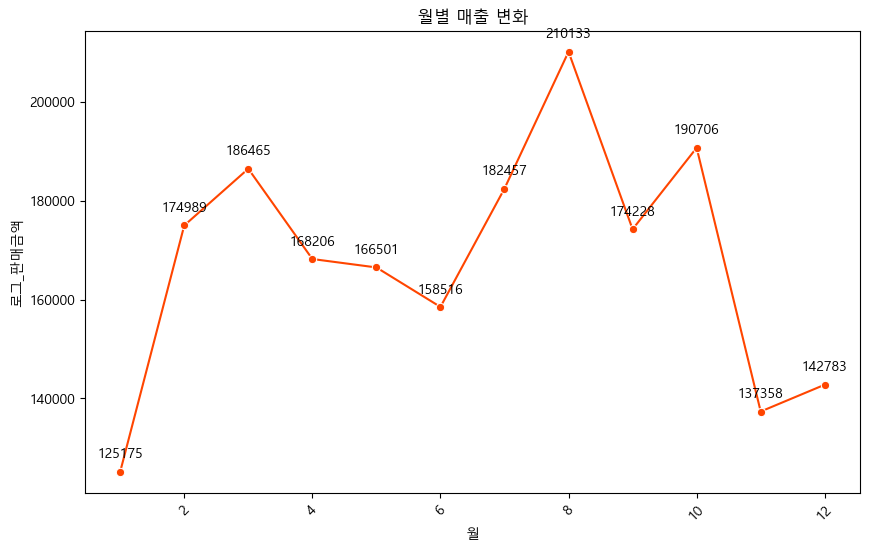

In [73]:
# 주문월별 매출 결과
answer_month = df.groupby(['주문월'])['로그_판매금액'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='주문월', y='로그_판매금액', data=answer_month, marker='o', color='orangered')
plt.title('월별 매출 변화')
plt.xlabel('월')
plt.ylabel('로그_판매금액')

# x 축 레이블 각도 설정 (선택적)
plt.xticks(rotation=45)

# 각 데이터 포인트에 판매금액 표시
for i, txt in enumerate(answer_month['로그_판매금액']):
    plt.annotate(f'{txt:.0f}', (answer_month['주문월'][i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

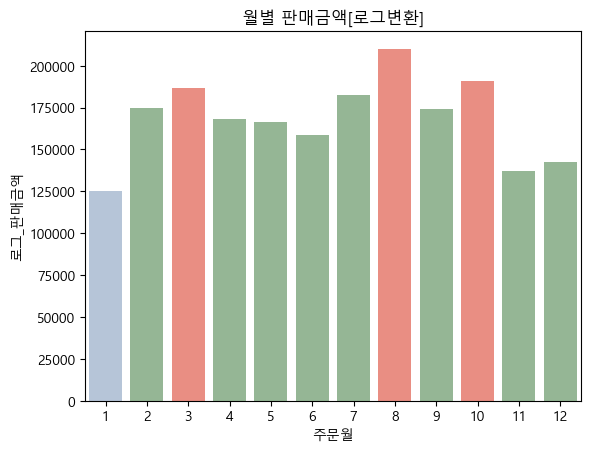

In [74]:
# 시각화
colors = ['lightsteelblue', 'darkseagreen', 'salmon', 'darkseagreen', 'darkseagreen', 'darkseagreen',
          'darkseagreen', 'salmon', 'darkseagreen', 'salmon', 'darkseagreen', 'darkseagreen']
sns.barplot(x='주문월', y='로그_판매금액', data=answer_month, palette=colors)
plt.title('월별 판매금액[로그변환]')
plt.xlabel('주문월')
plt.ylabel('로그_판매금액')
plt.show()

In [75]:
df.head(2)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,NaN,8.517393,4분기,1476,2019,12,2019-12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,NaN,8.517393,4분기,1473,2019,12,2019-12


### 월별 순수익

In [76]:
df.head(1)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,NaN,8.517393,4분기,1476,2019,12,2019-12


In [77]:
df3 = df[['업체명' , '판매금액', '주문월', '할부기간']]
df3.head(3)

,업체명,판매금액,주문월,할부기간
0,지니,5000,12,NaN
1,지니,5000,12,NaN
2,지니,67500,12,NaN


In [78]:
df3.value_counts("할부기간")

할부기간
12개월    823
1개월     493
6개월     395
24개월    200
18개월     15
dtype: int64

#### 결제방법은 맨 앞의 한가지만 사용한 것으로 간주 - 필터링 진행

In [79]:
df['결제방법'].value_counts()

신용카드         120148
포인트           29727
신 + 포         28145
신 + 웰컴         8494
웰컴마일           7487
신 + 적          6387
현금간편결제         5281
적립금            3232
신 + 적 + 포      2830
현 + 포          1536
-              1361
적 + 포          1353
정기결제           1142
현 + 적           308
후불              257
정 + 포           237
현 + 적 + 포       222
정 + 적           131
후 + 포            95
정 + 적 + 포        73
가상계좌             45
무통장입금             4
후 + 적             2
 + 포              2
후 + 적 + 포         1
Name: 결제방법, dtype: int64

In [80]:
# - 전처리
df = df[~df['결제방법'].str.startswith('-')]
# " + 포"를 "포"로 바꾸기
df['결제방법'] = df['결제방법'].str.replace(' + 포', '포인트')

C:\Users\simhyunji\AppData\Local\Temp\ipykernel_24512\763827351.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['결제방법'] = df['결제방법'].str.replace(' + 포', '포인트')


In [81]:
df.value_counts("결제방법")

결제방법
신용카드         120148
포인트           29727
신 + 포         28145
신 + 웰컴         8494
웰컴마일           7487
신 + 적          6387
현금간편결제         5281
적립금            3232
신 + 적 + 포      2830
현 + 포          1536
적 + 포          1353
정기결제           1142
현 + 적           308
후불              257
정 + 포           237
현 + 적 + 포       222
정 + 적           131
후 + 포            95
정 + 적 + 포        73
가상계좌             45
무통장입금             4
후 + 적             2
 + 포              2
후 + 적 + 포         1
dtype: int64

In [82]:
# 결제방법 통일 함수
def unify_payment_method(payment):
    first_letter = payment[0] if payment else ''
    
    if first_letter == '신':
        return '신용카드'
    elif first_letter == '포':
        return '포인트'
    elif first_letter == '현':
        return '현금간편결제'
    elif first_letter == '후':
        return '후불결제'
    elif first_letter == '가':
        return '가상계좌'
    elif first_letter == '정':
        return '정기결제'
    elif first_letter == '무':
        return '무통장입금'
    elif first_letter == ' ':
        return '포인트'
    elif first_letter == "적":
        return '적립금'
    else:
        return payment

# '결제방법'을 통일하여 '결제방법_통일' 컬럼에 추가
df['결제방법_통일'] = df['결제방법'].apply(unify_payment_method)

# 결과 출력
print(df[['결제방법', '결제방법_통일']])


         결제방법 결제방법_통일
0        신용카드    신용카드
1        신용카드    신용카드
2        신용카드    신용카드
3        신용카드    신용카드
4        신용카드    신용카드
...       ...     ...
218596   웰컴마일    웰컴마일
218597   웰컴마일    웰컴마일
218598  신 + 포    신용카드
218599    포인트     포인트
218600   신용카드    신용카드

[217139 rows x 2 columns]


In [83]:
df_=df.value_counts("결제방법_통일").to_frame().reset_index()
df_
df_.columns = ['결제방법_통일', '결제건수']
df_
# 데이터프레임의 컬럼 이름 변경

,결제방법_통일,결제건수
0,신용카드,166004
1,포인트,29729
2,웰컴마일,7487
3,현금간편결제,7347
4,적립금,4585
5,정기결제,1583
6,후불결제,355
7,가상계좌,45
8,무통장입금,4


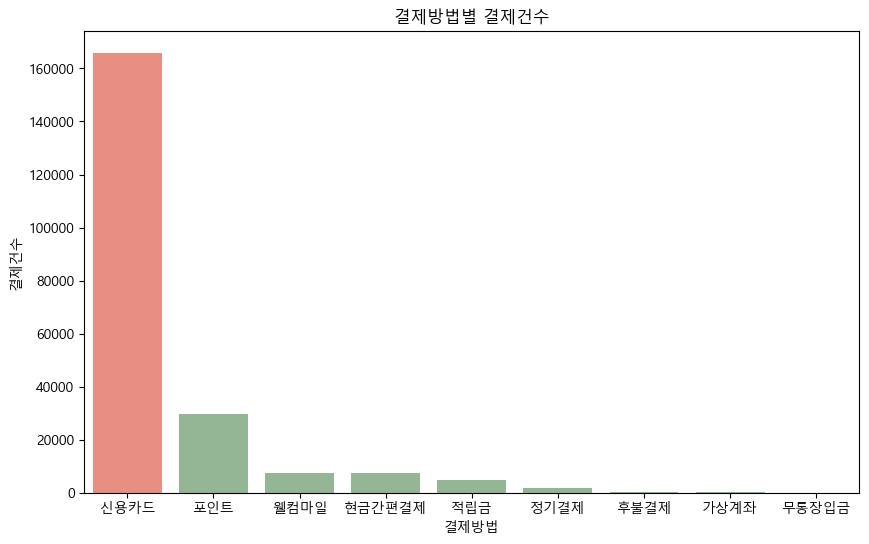

In [84]:
# 색상 설정
colors = ['salmon', 'darkseagreen', 'darkseagreen', 'darkseagreen', 'darkseagreen', 'darkseagreen', 'darkseagreen', 'darkseagreen', 'lightsteelblue']

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='결제방법_통일', y='결제건수', data=df_, palette=colors)
plt.title('결제방법별 결제건수')
plt.xlabel('결제방법')
plt.ylabel('결제건수')
plt.show()

In [85]:
df.head(5)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월,결제방법_통일
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,NaN,8.517393,4분기,1476,2019,12,2019-12,신용카드
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,NaN,8.517393,4분기,1473,2019,12,2019-12,신용카드
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,NaN,11.119898,4분기,1473,2019,12,2019-12,신용카드
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16,구매확정,NaN,10.308986,4분기,1473,2019,12,2019-12,신용카드
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16,구매확정,NaN,6.621406,4분기,1473,2019,12,2019-12,신용카드


In [86]:
#결제방법에 따른 판매금액 평균
answer3= df.groupby('결제방법_통일')['로그_판매금액'].mean().reset_index()
answer3

,결제방법_통일,로그_판매금액
0,가상계좌,8.683294
1,무통장입금,9.101566
2,신용카드,9.233853
3,웰컴마일,8.775319
4,적립금,8.772996
5,정기결제,13.465413
6,포인트,8.914677
7,현금간편결제,9.352045
8,후불결제,13.811784


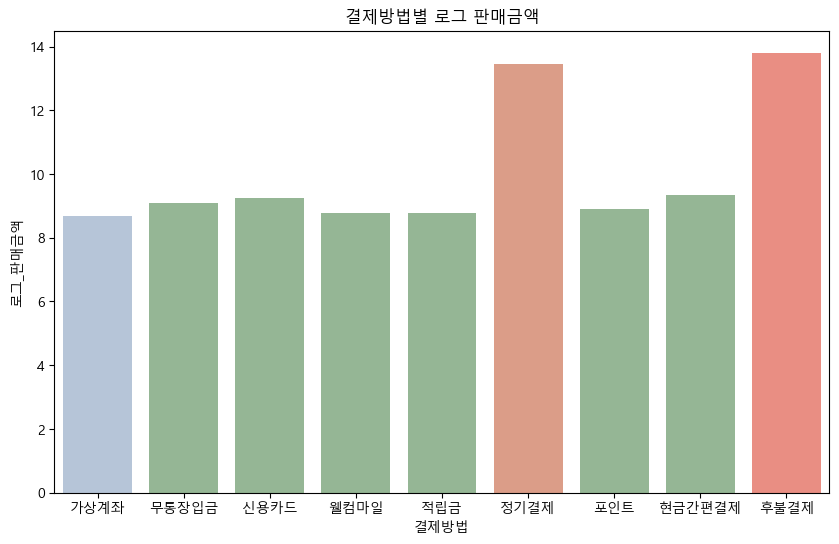

In [87]:
# 시각화
colors = ["lightsteelblue","darkseagreen","darkseagreen","darkseagreen","darkseagreen","darksalmon","darkseagreen","darkseagreen","salmon"]
plt.figure(figsize=(10, 6))
sns.barplot(x='결제방법_통일', y='로그_판매금액', data=answer3, palette=colors)
plt.title('결제방법별 로그 판매금액')
plt.xlabel('결제방법')
plt.ylabel('로그_판매금액')
plt.show()

In [88]:
df.loc[df['결제방법_통일'] == "후불결제"] # 태블릿 가격대가 높음

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월,결제방법_통일
10,191218131749825,지니,"HBE종이컵-1Box 1,000개입",HB,5.0,105000,후불,2019-12-18,후불반려,NaN,11.561725,4분기,1471,2019,12,2019-12,후불결제
25623,201020114033140,셀러테스트,일반상품 결제 테스트2,HB,1.0,300000,후불,2020-10-20,미결제,12개월,12.611541,4분기,1164,2020,10,2020-10,후불결제
25624,201020114109190,셀러테스트,일반상품 결제 테스트2,HB,1.0,300000,후불,2020-10-20,미결제,12개월,12.611541,4분기,1164,2020,10,2020-10,후불결제
25666,201020140724988,지니,후불결제 테스트,삼성전자,1.0,396000,후불,2020-10-20,주문취소,12개월,12.889172,4분기,1164,2020,10,2020-10,후불결제
25673,201020140823524,지니,후불결제 테스트,삼성전자,1.0,396000,후불,2020-10-20,환불완료,12개월,12.889172,4분기,1164,2020,10,2020-10,후불결제
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30241,201120092335329,지니,[스마트 HBE] 학습 전용 태블릿(신규 가맹점용),삼성전자,1.0,384000,후불,2020-11-20,구매확정,1개월,12.858400,4분기,1133,2020,11,2020-11,후불결제
30276,201120134717992,지니,[스마트 HBE] 학습 전용 태블릿(신규 가맹점용),삼성전자,1.0,384000,후불,2020-11-20,구매확정,1개월,12.858400,4분기,1133,2020,11,2020-11,후불결제
30312,201120164443993,지니,[스마트 HBE] 학습 전용 태블릿(신규 가맹점용),삼성전자,3.0,1152000,후불,2020-11-20,구매확정,1개월,13.957011,4분기,1133,2020,11,2020-11,후불결제
30616,201124141755272,지니,[스마트 HBE] 학습 전용 태블릿(신규 가맹점용),삼성전자,3.0,1152000,후불,2020-11-24,구매확정,1개월,13.957011,4분기,1129,2020,11,2020-11,후불결제


In [89]:
df.loc[df['결제방법_통일'] == "신용카드"] 

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월,결제방법_통일
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-13,구매확정,NaN,8.517393,4분기,1476,2019,12,2019-12,신용카드
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1.0,5000,신용카드,2019-12-16,구매확정,NaN,8.517393,4분기,1473,2019,12,2019-12,신용카드
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3.0,67500,신용카드,2019-12-16,구매확정,NaN,11.119898,4분기,1473,2019,12,2019-12,신용카드
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2.0,30000,신용카드,2019-12-16,구매확정,NaN,10.308986,4분기,1473,2019,12,2019-12,신용카드
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1.0,750,신용카드,2019-12-16,구매확정,NaN,6.621406,4분기,1473,2019,12,2019-12,신용카드
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218591,221108102949623,다우기술,[따뜻달달특가] 투썸플레이스-카페라떼(R),투썸플레이스,NaN,8200,신용카드,2022-11-08,배송완료,NaN,9.012011,4분기,415,2022,11,2022-11,신용카드
218594,221108103621476,다우기술,[신세계] 신세계 상품권-1만원권,신세계,NaN,9600,신용카드,2022-11-08,배송완료,NaN,9.169623,4분기,415,2022,11,2022-11,신용카드
218595,221108103722743,다우기술,[신세계] 신세계 상품권-1만원권,신세계,NaN,9600,신용카드,2022-11-08,배송완료,NaN,9.169623,4분기,415,2022,11,2022-11,신용카드
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,NaN,26900,신 + 포,2022-11-08,배송준비,NaN,10.199919,4분기,415,2022,11,2022-11,신용카드


In [90]:
df.loc[df['결제방법_통일'] == "후불결제"]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,할부기간,로그_판매금액,분기,Recency,주문연도,주문월,주문연도월,결제방법_통일
10,191218131749825,지니,"HBE종이컵-1Box 1,000개입",HB,5.0,105000,후불,2019-12-18,후불반려,NaN,11.561725,4분기,1471,2019,12,2019-12,후불결제
25623,201020114033140,셀러테스트,일반상품 결제 테스트2,HB,1.0,300000,후불,2020-10-20,미결제,12개월,12.611541,4분기,1164,2020,10,2020-10,후불결제
25624,201020114109190,셀러테스트,일반상품 결제 테스트2,HB,1.0,300000,후불,2020-10-20,미결제,12개월,12.611541,4분기,1164,2020,10,2020-10,후불결제
25666,201020140724988,지니,후불결제 테스트,삼성전자,1.0,396000,후불,2020-10-20,주문취소,12개월,12.889172,4분기,1164,2020,10,2020-10,후불결제
25673,201020140823524,지니,후불결제 테스트,삼성전자,1.0,396000,후불,2020-10-20,환불완료,12개월,12.889172,4분기,1164,2020,10,2020-10,후불결제
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30241,201120092335329,지니,[스마트 HBE] 학습 전용 태블릿(신규 가맹점용),삼성전자,1.0,384000,후불,2020-11-20,구매확정,1개월,12.858400,4분기,1133,2020,11,2020-11,후불결제
30276,201120134717992,지니,[스마트 HBE] 학습 전용 태블릿(신규 가맹점용),삼성전자,1.0,384000,후불,2020-11-20,구매확정,1개월,12.858400,4분기,1133,2020,11,2020-11,후불결제
30312,201120164443993,지니,[스마트 HBE] 학습 전용 태블릿(신규 가맹점용),삼성전자,3.0,1152000,후불,2020-11-20,구매확정,1개월,13.957011,4분기,1133,2020,11,2020-11,후불결제
30616,201124141755272,지니,[스마트 HBE] 학습 전용 태블릿(신규 가맹점용),삼성전자,3.0,1152000,후불,2020-11-24,구매확정,1개월,13.957011,4분기,1129,2020,11,2020-11,후불결제


In [91]:
df.loc[df['결제방법_통일'] == "후불결제"].value_counts("제조사") 

제조사
삼성전자    351
HB        3
dtype: int64

In [92]:
contingency_table = pd.crosstab(df['결제방법_통일'], df['로그_판매금액'])

# 카이제곱 독립성 검정 수행
chi2, p, _, _ = chi2_contingency(contingency_table)
# 결과 출력
print(f"카이제곱 통계량: {chi2}")
print("P-value:", p)

# 유의수준 0.05에서의 검정
alpha = 0.05
if p < alpha:
    print("결제방법과 판매금액은 독립적이지 않고 영향을 받는다.")
else:
    print("결제방법과 판매금액은 독립적이고 영향을 받지 않는다.")

카이제곱 통계량: 361927.40284116805
P-value: 0.0
결제방법과 판매금액은 독립적이지 않고 영향을 받는다.


In [93]:
chi2_contingency(contingency_table)

(361927.40284116805,
 0.0,
 27560,
 array([[6.63169675e-03, 4.76653204e-03, 4.14481047e-04, ...,
         4.14481047e-04, 2.07240523e-04, 2.07240523e-04],
        [5.89484155e-04, 4.23691737e-04, 3.68427597e-05, ...,
         3.68427597e-05, 1.84213799e-05, 1.84213799e-05],
        [2.44641819e+01, 1.75836308e+01, 1.52901137e+00, ...,
         1.52901137e+00, 7.64505685e-01, 7.64505685e-01],
        ...,
        [4.38119361e+00, 3.14898291e+00, 2.73824601e-01, ...,
         2.73824601e-01, 1.36912300e-01, 1.36912300e-01],
        [1.08273502e+00, 7.78215797e-01, 6.76709389e-02, ...,
         6.76709389e-02, 3.38354694e-02, 3.38354694e-02],
        [5.23167188e-02, 3.76026416e-02, 3.26979492e-03, ...,
         3.26979492e-03, 1.63489746e-03, 1.63489746e-03]]))